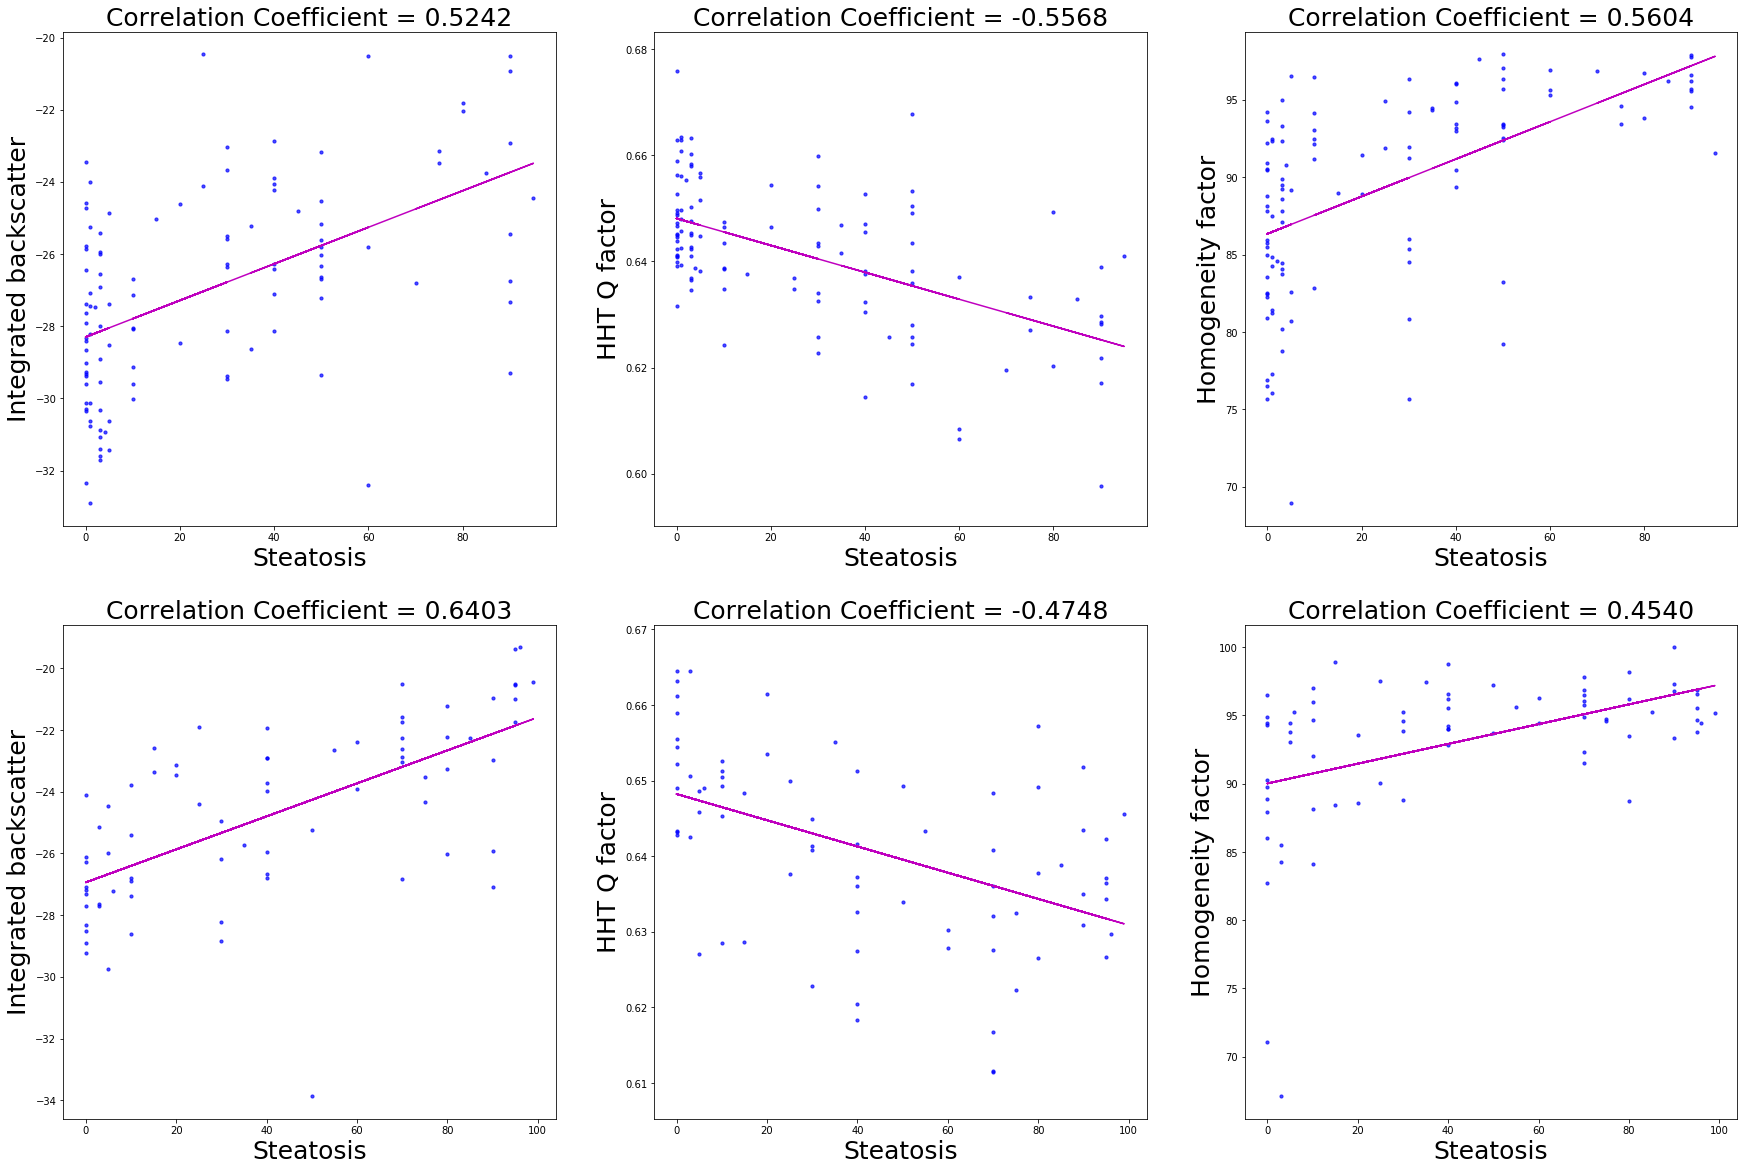

In [2]:
# Scatter & Trend-line & Correlation Coefficient plot

# import models
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]

X_train = data.col_values(1)  # X = Pathology

y_train = np.zeros((111, 3))
y_train[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_train[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_train[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]

X_test = data.col_values(1)   # X = NPathology

y_test = np.zeros((74, 3))
y_test[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_test[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_test[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

R = []
S = []
categories = ['Integrated backscatter', 'HHT Q factor', 'Homogeneity factor']

# correlation coefficient
for i in range(3):
    R.append(np.corrcoef(X_train, y_train[:, i])[1,0])
    S.append(np.corrcoef(X_test, y_test[:, i])[1,0])

# plot
plt.figure(figsize = (30, 20))

for i in range(3):
    plt.subplot(2, 3, 1+i)
    plt.scatter(X_train, y_train[:, i], s = 10, c = 'blue', alpha = 0.7)
    plt.xlabel('Steatosis', size = 25)
    plt.ylabel('{0}'.format(categories[i]), size = 25)
    plt.title('Correlation Coefficient = {0:0.4f}'.format(R[i]), size=25)
    
    ## calc the trendline (it is simply a linear fitting)
    z1 = np.polyfit(X_train, y_train[:, i], 1)
    p1 = np.poly1d(z1)
    plt.plot(X_train, p1(X_train),'m-')
    
    plt.subplot(2, 3, 4+i)
    plt.scatter(X_test, y_test[:, i], s = 10, c = 'blue', alpha = 0.7)
    plt.xlabel('Steatosis', size = 25)
    plt.ylabel('{0}'.format(categories[i]), size = 25)
    plt.title('Correlation Coefficient = {0:0.4f}'.format(S[i]), size=25)

    ## calc the trendline (it is simply a linear fitting)
    z2 = np.polyfit(X_test, y_test[:, i], 1)
    p2 = np.poly1d(z2)
    plt.plot(X_test, p2(X_test),'m-')
plt.show()

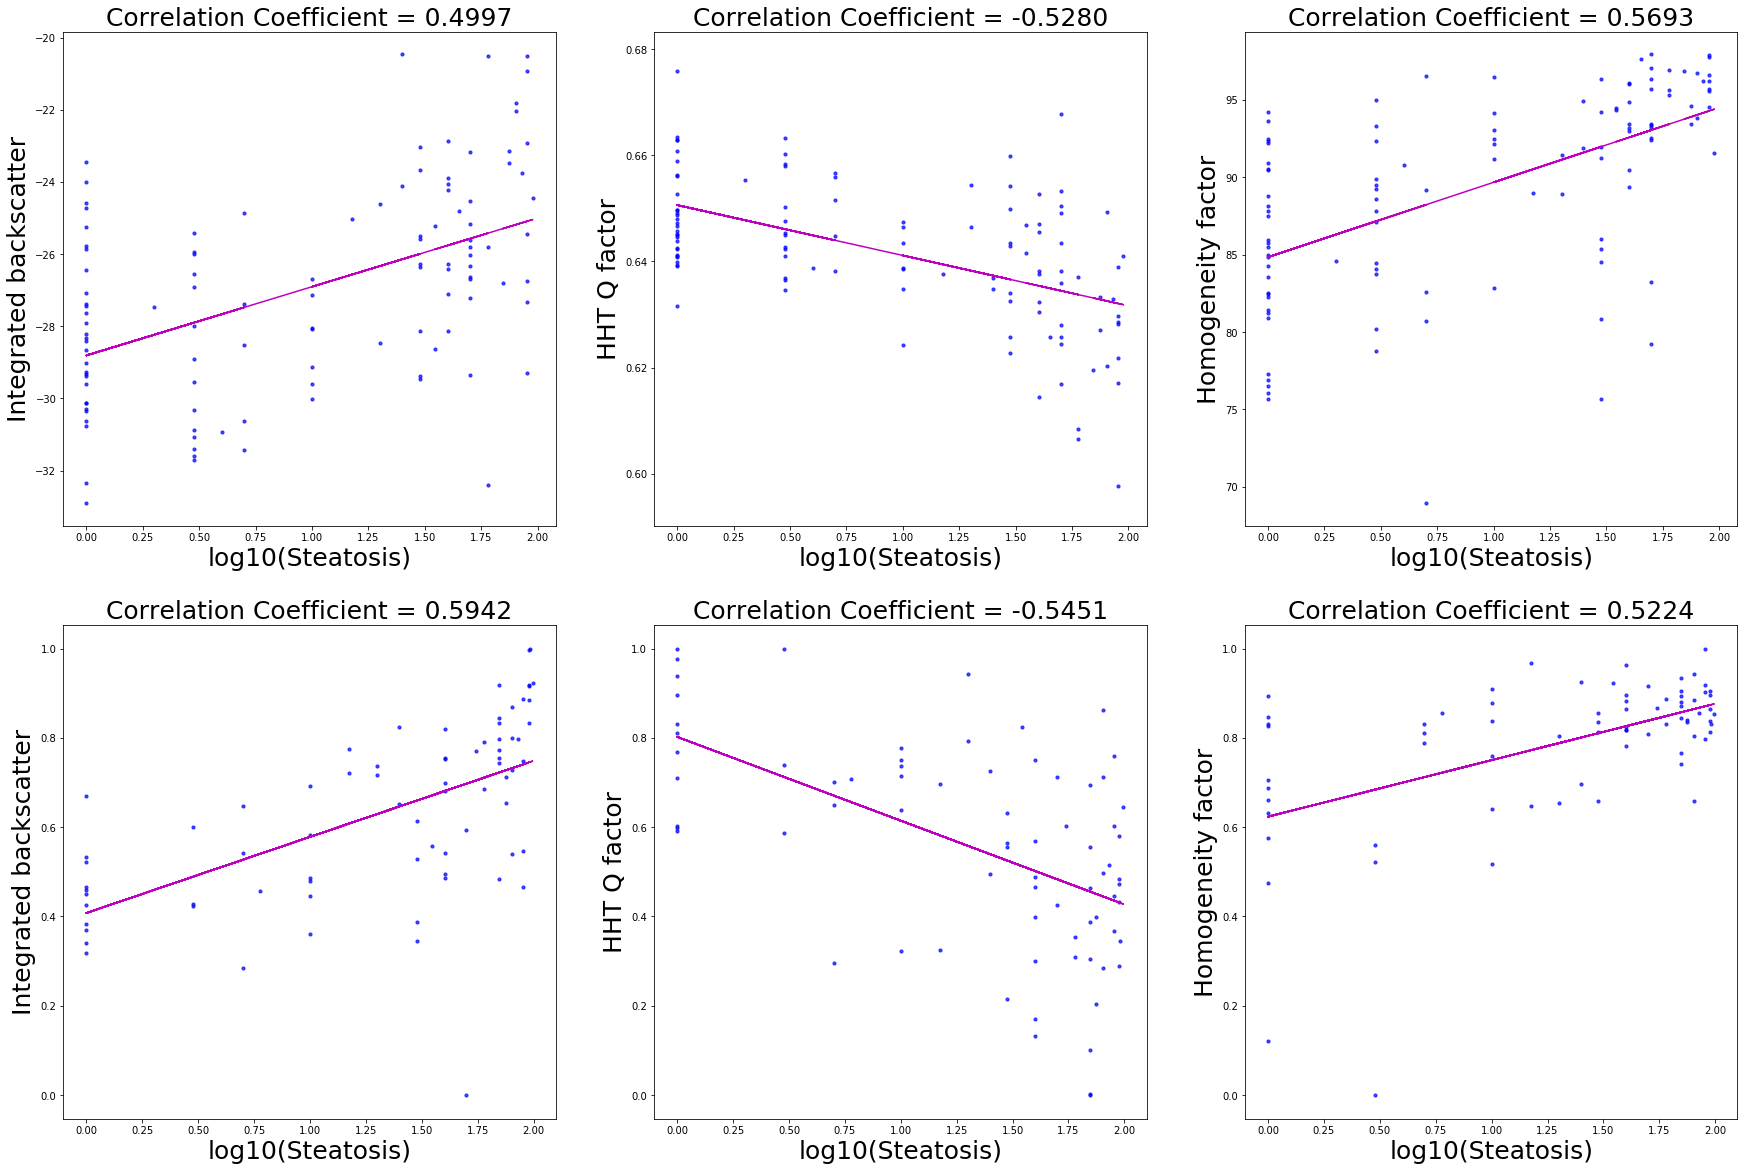

In [4]:
# Scatter & Trend-line & Correlation Coefficient plot

# import models
import matplotlib.pyplot as plt
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]

X_train = data.col_values(2)  # X = Pathology

y_train = np.zeros((111, 3))
y_train[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_train[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_train[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]

X_test = data.col_values(2)   # X = NPathology

y_test = np.zeros((74, 3))
y_test[:, 0] = data.col_values(3)  # y0 = Integrated backscatter
y_test[:, 1] = data.col_values(4)  # y1 = Q factor (HHT)
y_test[:, 2] = data.col_values(6)  # y2 = Homogeneity factor

### scaling to 0~1
y_test = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(y_te).transform(y_te)

R = []
S = []
categories = ['Integrated backscatter', 'HHT Q factor', 'Homogeneity factor']

# correlation coefficient
for i in range(3):
    R.append(np.corrcoef(X_train, y_train[:, i])[1,0])
    S.append(np.corrcoef(X_test, y_test[:, i])[1,0])

# plot
plt.figure(figsize = (30, 20))

for i in range(3):
    plt.subplot(2, 3, 1+i)
    plt.scatter(X_train, y_train[:, i], s = 10, c = 'blue', alpha = 0.7)
    plt.xlabel('log10(Steatosis)', size = 25)
    plt.ylabel('{0}'.format(categories[i]), size = 25)
    plt.title('Correlation Coefficient = {0:0.4f}'.format(R[i]), size=25)
    
    ## calc the trendline (it is simply a linear fitting)
    z1 = np.polyfit(X_train, y_train[:, i], 1)
    p1 = np.poly1d(z1)
    plt.plot(X_train, p1(X_train),'m-')
    
    plt.subplot(2, 3, 4+i)
    plt.scatter(X_test, y_test[:, i], s = 10, c = 'blue', alpha = 0.7)
    plt.xlabel('log10(Steatosis)', size = 25)
    plt.ylabel('{0}'.format(categories[i]), size = 25)
    plt.title('Correlation Coefficient = {0:0.4f}'.format(S[i]), size=25)

    ## calc the trendline (it is simply a linear fitting)
    z2 = np.polyfit(X_test, y_test[:, i], 1)
    p2 = np.poly1d(z2)
    plt.plot(X_test, p2(X_test),'m-')
plt.show()